<a href="https://colab.research.google.com/github/Luis-David-124/MetodosComputacionales810/blob/main/Students/Betancur_9784/Parciales/Copia_de_Parcial2_810.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


## Nombre: Luis David Betancur Cespedes

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error asociado a $f'(x)$ absoluto en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [173]:
# Aqui va su código

# a)
def derivada(f,x, tol = 1e-8):
  '''
  Busca la derivada de f en x para varios valores de h usando diferencias finitas centradas y devuelve una lista de las derivadas juntoa sus h

  Entradas:

  f: funcion
  x: abscisa
  tol: tolerancia (Por defecto en 1e-8)

  Salidas:

  valor_derivada: lista de derivadas
  h_valores: lista de h tomados
  '''

  # Inicia listas de valores de la derivada y de h
  valor_derivada = []
  h_valores = []

  # inicia variable para h
  h = 0.1

  # primera derivada calculada
  derivada_inicial = (f(x + h) - f(x - h))/(2*h)

  valor_derivada.append(derivada_inicial)
  h_valores.append(h)
  while(True):

    h -= h/10
    derivada = (f(x + h) - f(x - h))/(2*h) # Se calcula la siguiente derivada usando el siguiente valor de h

    if abs(derivada_inicial - derivada) < tol: # Se comparan ambas derivadas tomadas
      return valor_derivada, h_valores

    valor_derivada.append(derivada)
    h_valores.append(h)

    derivada_inicial = derivada # se cambia la derivada inicial para la siguiente comparacion

9.887510598012987


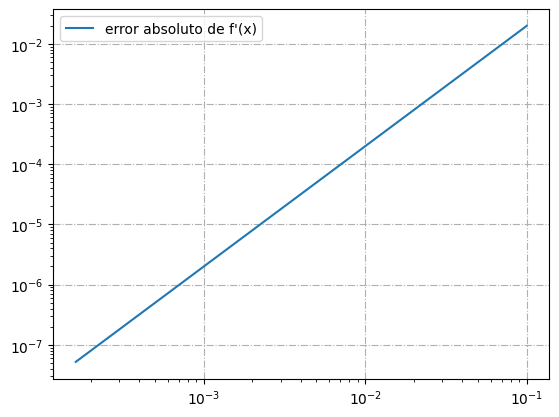

In [174]:
# b)
f = lambda x: 3**x
df = lambda x: 3**x * np.log(3)
valor_derivada, h_valores = derivada(f, 2)

error_abs = abs(df(2) - valor_derivada)
print(df(2))
plt.loglog(h_valores, error_abs, label= "error absoluto de f'(x)")

plt.grid(linestyle= '-.')
plt.legend()

## 2


**(40 puntos)** Considere una barra delgada y homogénea de longitud $L = 1.0\ \text{m}$ que está sometida a una conducción de calor en régimen estacionario. Se ha medido la temperatura a lo largo de la barra en ciertos puntos:

| $x$ (m) | $T(x)$ (°C) |
|--------|--------------|
| 0.0    | 100.0        |
| 0.2    | 92.1         |
| 0.4    | 77.8         |
| 0.6    | 59.3         |
| 0.8    | 35.6         |
| 1.0    | 10.0         |


Con base en estos datos responda:

---

a. Encuentre una expresión para el polinomio interpolador de **Lagrange** para $T(x)$

---

b. Usando la función obtenida por **Lagrange** y haciendo **CubicSpline**, haga un gráfico donde muestre el comportanmiento de las funciones en comparación con los datos experimentales.

---

c. Calcule el **gradiente térmico** $\frac{dT}{dx}$ usando los datos procedentes de interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

d. Determinar el **flujo de calor** $q(x) = -k \frac{dT}{dx}$ con $k = 401\ \text{W/m·K}$ (cobre) y grafique para $x\in [0, 1]$.



In [163]:
# Aquí va su código

# Datos
longitud = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0] # x(m)
temperatura = [100.0, 92.1, 77.8, 59.3, 35.6, 10.0] # T(x) °c

L = 1.0 #m

In [164]:
# a)
T_lagrange = lagrange(longitud, temperatura) # Polinomio interpolador de lagrange

print(f'El polinomio interpolador de lagrange es:')
print(T_lagrange)

El polinomio interpolador de lagrange es:
       5       4         3         2
195.3 x - 474 x + 419.3 x - 222.3 x - 8.333 x + 100


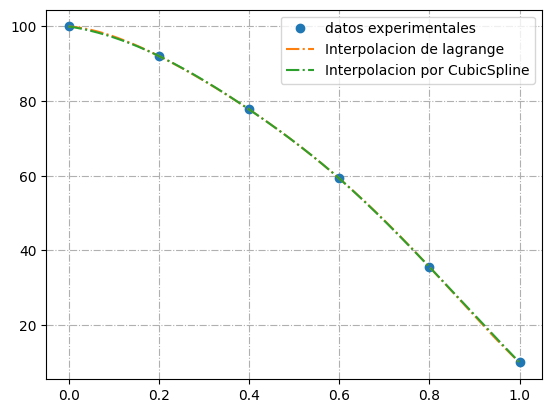

In [165]:
# b)
T_CubicSpline = CubicSpline(longitud, temperatura) # Polinomio interpolador por cubicspline

h = 1e-4 # La distancia entre puntos pedida para el punto c

longitud_interpolado = np.arange(0, L + h, h) # Eje de las abscisas para la grafica y la interpolacion (L + h Para que cubra todo el rango de 0m a 1m con la funcion arange)
temperatura_lagrange = T_lagrange(longitud_interpolado) # Interpolacion por lagrange
temperatura_CubicSpline = T_CubicSpline(longitud_interpolado) # Interpolacion por CubicSpline

''' ----------------------------------- Graficas ----------------------------------- '''
plt.plot(longitud, temperatura, 'o', label= 'datos experimentales')
plt.plot(longitud_interpolado, temperatura_lagrange, '-.', label= 'Interpolacion de lagrange')
plt.plot(longitud_interpolado, temperatura_CubicSpline, '-.', label= 'Interpolacion por CubicSpline')

plt.grid(linestyle= '-.')
plt.legend()


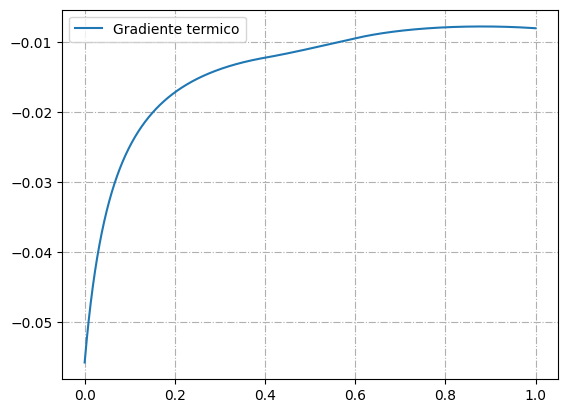

In [166]:
# c)

gradiente_termico = np.gradient(longitud_interpolado, temperatura_CubicSpline) # Gradiente termico, h fue definida en el punto b

''' ----------------------------------- Grafica ----------------------------------- '''
plt.plot(longitud_interpolado, gradiente_termico, label= 'Gradiente termico')

plt.grid(linestyle= '-.')
plt.legend()

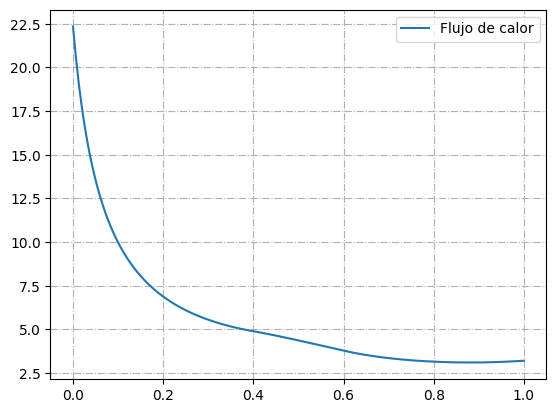

In [167]:
# d)
K = 401 #W/m⋅K
q = -K*gradiente_termico # flujo de calor en base a los datos previos del gradiente termico

''' ----------------------------------- Grafica ----------------------------------- '''
plt.plot(longitud_interpolado, q, label= 'Flujo de calor')

plt.grid(linestyle= '-.')
plt.legend()

# 3

**(30 puntos)** Consideremos una lámina triangular $R$ con vértices (0,0), (0,3), (3,0) y con densidad  $\rho (x,y) = xy$ [kg/m$^2$]

a. Calcule la masa total del sistema si:

$$
m = \iint_R \rho(x, y)\, dA = \int_0^3\int_0^{3-x} \rho(x,y)\, dydx
$$

Usando una forma iterativa de `quad`, compare su resultado con `dblquad`.


b. Ahora, encuentre el centro de masa de la lámina, si

$$
\bar{x} = \frac{M_y}{m} = \frac{\iint_R x \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}
$$

$$
\bar{y} = \frac{M_x}{m} = \frac{\iint_R y \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}.
$$

Puede usar la forma iterativa de `quad` o `dblquad`.

c. Calcule el **momento de inercia respecto al eje \$x\$**, definido como:

$$
I_x = \iint_R y^2\, \rho(x, y)\, dA,
$$





In [168]:
# Aquí va su código
# a)
p = lambda y, x:  x*y

# Para dbquad
a, b = 0, 3
g, h = 0, lambda x: 3-x

integral_DobleQuad = dblquad(p, a, b, g, h)[0]

# Para quad
def integral_dy(x):
  a, b = 0, 3-x

  f = lambda y: x*y

  return quad(f, a, b)[0]

a, b = 0, 3 # integral exterma
integral_Quad = quad(integral_dy, a, b)[0]

print(f'La doble integral usando quad fue: {integral_Quad}\n'
      f'Usando doble quad: {integral_DobleQuad}'
)

La doble integral usando quad fue: 3.375000000000001
Usando doble quad: 3.375000000000001


El centro de masa es: (1.1999999999999997, 1.2)


/tmp/ipython-input-169-150551580.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


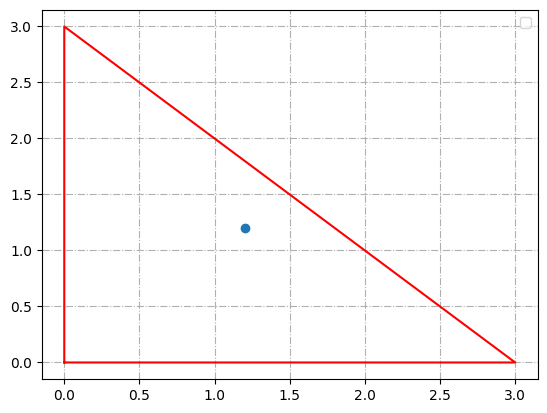

In [169]:
# b)
a, b = 0, 3
g, h = 0, lambda x: 3-x

m = integral_DobleQuad

My = lambda y, x: x*p(y, x) #Para el centro de masa en x
Mx = lambda y, x: y*p(y, x) #Para el centro de masa en y

x_Centro = dblquad(My, a, b, g, h)[0] / m # Centro de masa en x
y_Centro = dblquad(Mx, a, b, g, h)[0] / m # Centro de masa en y

print(f'El centro de masa es: {x_Centro, y_Centro}')

''' ----------------------------------- Triangulo y su centro de masa ----------------------------------- '''
x_triangulo = [0, 0, 3, 0]
y_tiriangulo = [0, 3, 0, 0]

plt.scatter(x_Centro, y_Centro)
plt.plot(x_triangulo, y_tiriangulo, color= 'red')

plt.grid(linestyle= '-.')
plt.legend()

In [170]:
# c)

fx = lambda y, x: y**2 *p(y, x) # funcion dentro de las integrales del momento de inercia
a, b = 0, 3
g, h = 0, lambda x: 3-x

Ix = dblquad(fx, a, b, g, h)[0] # Momento de inercia

print(f'El momento de inercia de la lamina es: {Ix}')

El momento de inercia de la lamina es: 6.075000000000001
